# Probando Clasificación con Gradiente descendente

In [182]:
import numpy as np
import matplotlib.pyplot as plt

In [188]:

mean00 = [-2,-2]
mean01 = [5,1]

cov00 = [[8,0],[0,8]]
cov01 = [[2,0],[0,2]]


class00 = np.random.multivariate_normal(mean00, cov00, size=100, check_valid='warn', tol=1e-8)
class01 = np.random.multivariate_normal(mean01, cov01, size=100, check_valid='warn', tol=1e-8)

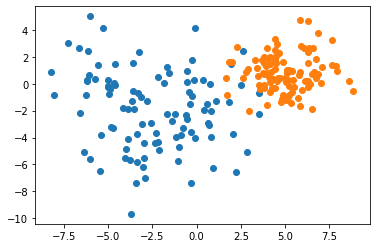

In [189]:
plt.scatter(class00[:,0],class00[:,1])
plt.scatter(class01[:,0],class01[:,1])

In [190]:
zeros = np.zeros(len(class00)).T
labeled_class00 = np.append(class00,np.transpose([zeros]),axis=1)
labeled_class01 = np.append(class01,np.transpose([zeros])+1,axis=1)


labeled_classes = np.append(labeled_class00,labeled_class01,axis=0)
len(labeled_classes)

200

Definimos nuestra función de "costo". Decidimos implementar la derivada de la verosimilitud 

$\frac{\partial LL(\theta)}{\partial \theta_j} = \sum_{i=1}^n [y_i-sigm(\theta^T\mathbf{x}_i)]x_j$

In [191]:
#La programación de la derivada de la función de costo 

param = [2,1]



def pd(x,y,a):
    s = 0
    
    for i in np.arange(len(x)):
        dif = ((y[i]-a*x[i]))
        s = s + dif*(x[i])
    return s

In [278]:

bias = 0
n = 0.0001
sigm = lambda x: 1/(1 + np.exp(-x))
#inicializar parametros theta
param = [1,1]


#repetir varias veces
for k in range(1000):
    
    #inicializar gradiente
    g = np.zeros(len(x)+1)

    #por cada tupla (x,y)
    for v in labeled_classes:
        s = 0
        x = v[:2]
        y = v[-1:]
        
        # por cada parametro
        for j in np.arange(len(x)):
            line = np.matmul(x,param)
            g[j]+=(y-sigm(line))*[x[j]]
        


        
    param += n*g[j]



In [279]:
bias

0

In [280]:
x = labeled_classes[0][:2]
y = labeled_classes[0][-1:]
print(x)
print(y)


[-0.42395344 -0.62614076]
[0.]


In [282]:
def f(x):
    return np.matmul(x,param)+bias
    

(np.array(list(map(f,labeled_classes[:,0:2])))>0.5)*1


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [283]:
a = param[0]
x = np.arange(-10,7)


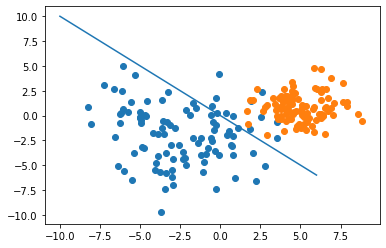

In [285]:


plt.plot(np.arange(-10,7),(param[1]/-param[0])*np.arange(-10,7))
plt.scatter(class00[:,0],class00[:,1])
plt.scatter(class01[:,0],class01[:,1])


In [ ]:


n = 0.0001
sigm = lambda x: 1/(1 + np.exp(-x))
#inicializar parametros theta
param = [1,1]
bias = 0
hparam = param

#repetir varias veces
for k in range(1000):
    
    #inicializar gradiente
    g = np.zeros(len(x)+1)

    #por cada tupla (x,y)
    for v in labeled_classes:
        s = 0
        x = v[:2]
        y = v[-1:]
        
        # por cada parametro
        for j in np.arange(len(x)):
            line = np.matmul(x,param)+1*bias
            g[j]+=(y-sigm(line))*[x[j]]
        
        
        g[2] += (y-sigm(line))*1

        
    param += n*g[j]
    bias += n*g[2]
